In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all our plots
sns.set_style("whitegrid")

In [ ]:
import pandas as pd
df = pd.read_csv('/content/csr-projects-social-sector-wise-aggregated-expenditure.csv')

In [ ]:
# Check if df is defined
if 'df' not in locals() and 'df' not in globals():
    print("Error: The dataframe 'df' is not defined.")
    print("Please run the cells above that load the data into the 'df' variable.")
else:
    # 1. Display the first 5 rows to see what the data looks like
    print("First 5 rows of the dataset:")
    display(df.head())

    # 2. Get a concise summary of the dataframe
    print("\nDataset Information:")
    df.info()

    # 3. Get descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    display(df.describe())

    # 4. Check the dimensions of the dataframe (rows, columns)
    print(f"\nDataset Shape: {df.shape}")

First 5 rows of the dataset:


,id,year,state_name,state_code,district_name,district_code,development_sector,project_outlay_amount_in_lakhs,amount_spent_in_lakhs
0,0,2014-01-01,All India,0,Not Mentioned,0,Agro Forestry,100.0,66.0
1,1,2014-01-01,All India,0,Not Mentioned,0,Animal Welfare,284.0,300.0
2,2,2014-01-01,All India,0,Not Mentioned,0,"Armed Forces, Veterans, War Widows/ Dependants",397.0,115.0
3,3,2014-01-01,All India,0,Not Mentioned,0,Art And Culture,3577.0,3586.0
4,4,2014-01-01,All India,0,Not Mentioned,0,Clean Ganga Fund,56.0,56.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489 entries, 0 to 8488
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8489 non-null   int64  
 1   year                            8489 non-null   object 
 2   state_name                      8489 non-null   object 
 3   state_code                      8489 non-null   int64  
 4   district_name                   8489 non-null   object 
 5   district_code                   8489 non-null   int64  
 6   development_sector              8489 non-null   object 
 7   project_outlay_amount_in_lakhs  8489 non-null   float64
 8   amount_spent_in_lakhs           8489 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 597.0+ KB

Descriptive Statistics:


,id,state_code,district_code,project_outlay_amount_in_lakhs,amount_spent_in_lakhs
count,8489.000000,8489.000000,8489.000000,8.489000e+03,8489.000000
mean,4244.000000,20.118271,250.253740,5.355118e+06,675.447377
std,2450.707551,11.274274,235.367899,1.225017e+08,4875.360338
min,0.000000,0.000000,0.000000,0.000000e+00,-5.000000
25%,2122.000000,8.000000,0.000000,5.000000e+00,5.000000
50%,4244.000000,23.000000,169.000000,3.100000e+01,24.000000
75%,6366.000000,28.000000,487.000000,2.070000e+02,125.000000
max,8488.000000,99.000000,733.000000,6.632660e+09,141492.770000



Dataset Shape: (8489, 9)


TASK 1:

Data Cleaning: This is a subset of data preprocessing. It specifically deals with handling issues in the raw data, such as:

Fixing or removing incorrect data.
Handling corrupted data.
Correcting incorrectly formatted data.
Identifying and removing duplicate entries.
Dealing with incomplete or missing values.
Data Preprocessing: This is a broader term that encompasses all the steps taken to transform raw data into a format suitable for analysis or machine learning. It includes:

Data Cleaning (as described above).
Data integration (combining data from different sources).
Data transformation (like scaling, normalization, or aggregation).
Data reduction (reducing the volume but producing the same or similar analytical results).
Feature engineering (creating new features from existing ones).
Handling categorical data (encoding).

In [ ]:
# Data Cleaning and Preprocessing

# 1. Handle Missing Values (if any)
# Check for missing values in each column
print("Missing values before handling:")
print(df.isnull().sum())

# 2. Convert Data Types
# Convert 'year' column to datetime objects
df['year'] = pd.to_datetime(df['year'])

# 3. Handle Outliers (if necessary, based on domain knowledge)
negative_spent = df[df['amount_spent_in_lakhs'] < 0]
print("\nRows with negative amount_spent_in_lakhs:")
display(negative_spent)

df['amount_spent_in_lakhs'] = df['amount_spent_in_lakhs'].apply(lambda x: max(0, x))

# 4. Check for Duplicate Rows
print("\nNumber of duplicate rows before dropping:")
print(df.duplicated().sum())

# If there were duplicates, we would drop them using:
# df.drop_duplicates(inplace=True)

print("\nData Cleaning and Preprocessing complete.")
print("\nDataset Information after preprocessing:")
df.info()

Missing values before handling:
id                                0
year                              0
state_name                        0
state_code                        0
district_name                     0
district_code                     0
development_sector                0
project_outlay_amount_in_lakhs    0
amount_spent_in_lakhs             0
dtype: int64

Rows with negative amount_spent_in_lakhs:


,id,year,state_name,state_code,district_name,district_code,development_sector,project_outlay_amount_in_lakhs,amount_spent_in_lakhs
1007,1007,2015-01-01,Delhi,7,Not Mentioned,0,Not Mentioned,24.0,-5.0



Number of duplicate rows before dropping:
0

Data Cleaning and Preprocessing complete.

Dataset Information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8489 entries, 0 to 8488
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8489 non-null   int64         
 1   year                            8489 non-null   datetime64[ns]
 2   state_name                      8489 non-null   object        
 3   state_code                      8489 non-null   int64         
 4   district_name                   8489 non-null   object        
 5   district_code                   8489 non-null   int64         
 6   development_sector              8489 non-null   object        
 7   project_outlay_amount_in_lakhs  8489 non-null   float64       
 8   amount_spent_in_lakhs           8489 non-null   float64       
dtypes: datetime

Task 2: Visualize Data Distribution

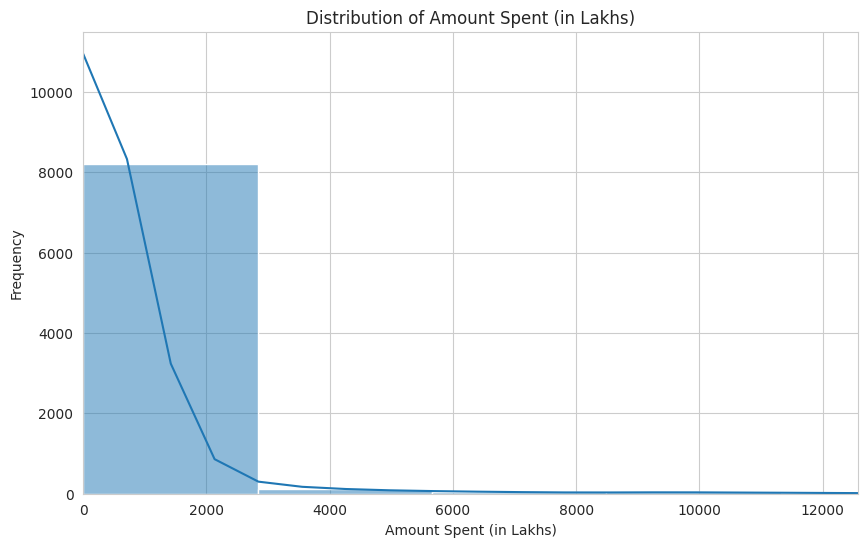

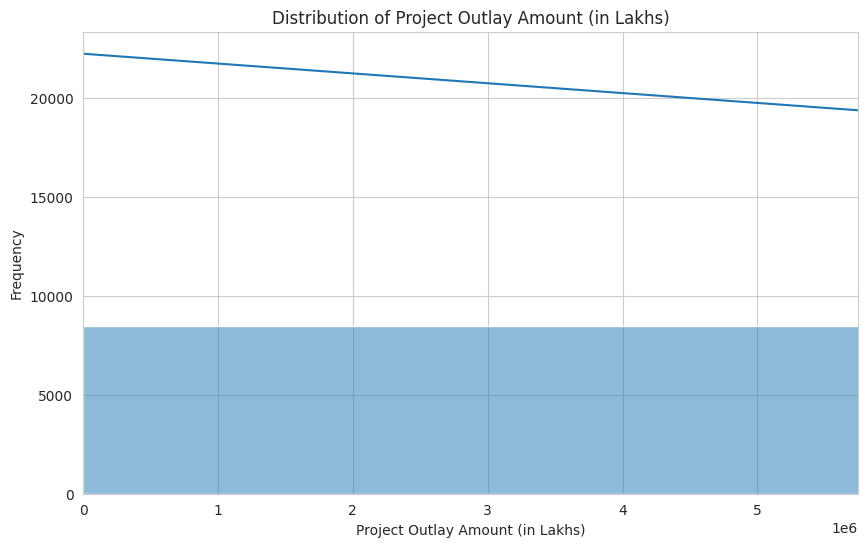

In [ ]:
# Data Visualization

# Visualize the distribution of 'amount_spent_in_lakhs'
plt.figure(figsize=(10, 6))
sns.histplot(df['amount_spent_in_lakhs'], bins=50, kde=True)
plt.title('Distribution of Amount Spent (in Lakhs)')
plt.xlabel('Amount Spent (in Lakhs)')
plt.ylabel('Frequency')
plt.xlim(0, df['amount_spent_in_lakhs'].quantile(0.99)) # Limit x-axis to 99th percentile for better visibility of the majority of data
plt.show()

# Visualize the distribution of 'project_outlay_amount_in_lakhs'
plt.figure(figsize=(10, 6))
sns.histplot(df['project_outlay_amount_in_lakhs'], bins=50, kde=True)
plt.title('Distribution of Project Outlay Amount (in Lakhs)')
plt.xlabel('Project Outlay Amount (in Lakhs)')
plt.ylabel('Frequency')
plt.xlim(0, df['project_outlay_amount_in_lakhs'].quantile(0.99)) # Limit x-axis to 99th percentile for better visibility
plt.show()

1.Both graphs (Amount Spent and Project Outlay) show a right-skewed distribution.      

2.This means most projects have lower values for both the amount spent and the project outlay.

3.There are a few projects with significantly higher values, appearing as outliers or a long tail on the right side of the distribution.

4.The x-axis was limited to the 99th percentile to make the patterns in the majority of the data more visible, as the extreme values would otherwise flatten the rest of the histogram.

5.Overall, the visualizations indicate a wide range in project sizes based on their planned outlay and actual spending.

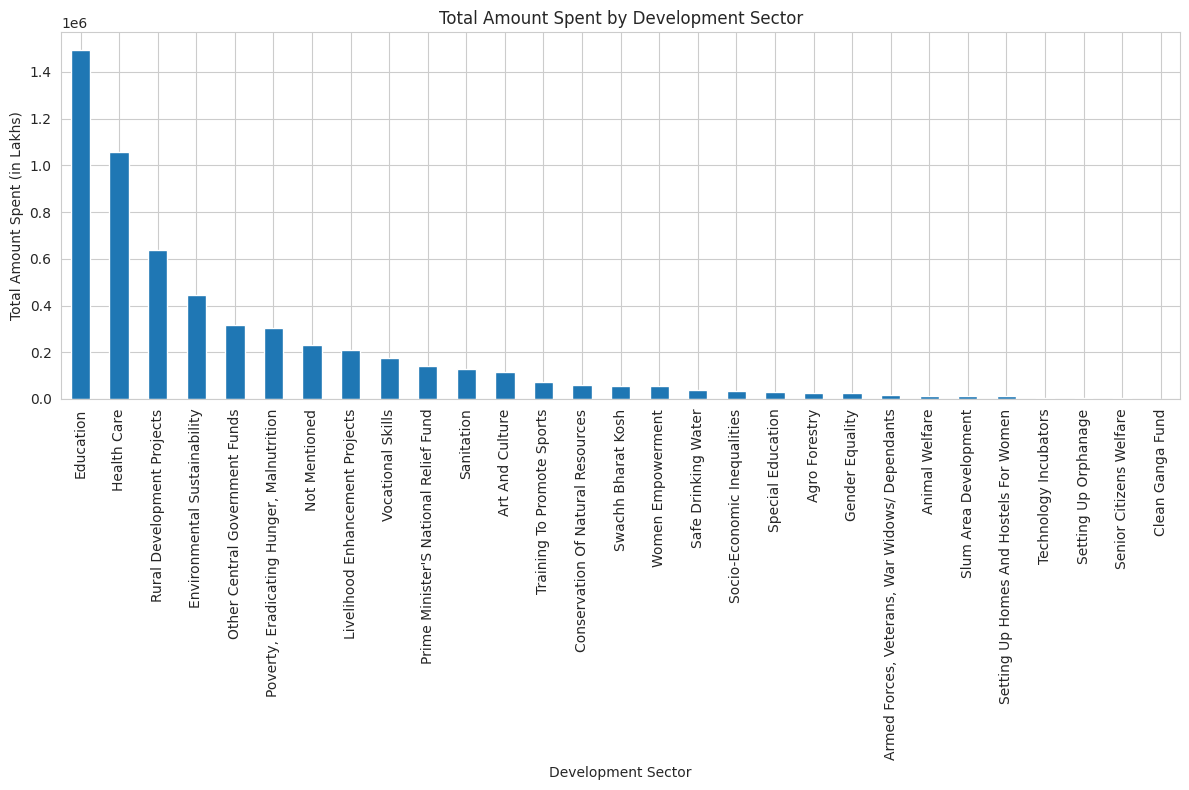

In [ ]:
# Calculate the total amount spent by development sector
sector_expenditure = df.groupby('development_sector')['amount_spent_in_lakhs'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
sector_expenditure.plot(kind='bar')
plt.title('Total Amount Spent by Development Sector')
plt.xlabel('Development Sector')
plt.ylabel('Total Amount Spent (in Lakhs)')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

1.The tallest bars represent the sectors where the most money was spent. Based on this chart, 'Education' and 'Health Care' appear to have received the largest total expenditures.

2.The bars are ordered from the highest total spending to the lowest, making it easy to see which sectors were prioritized in terms of overall investment.

3.Sectors with shorter bars received less total funding.

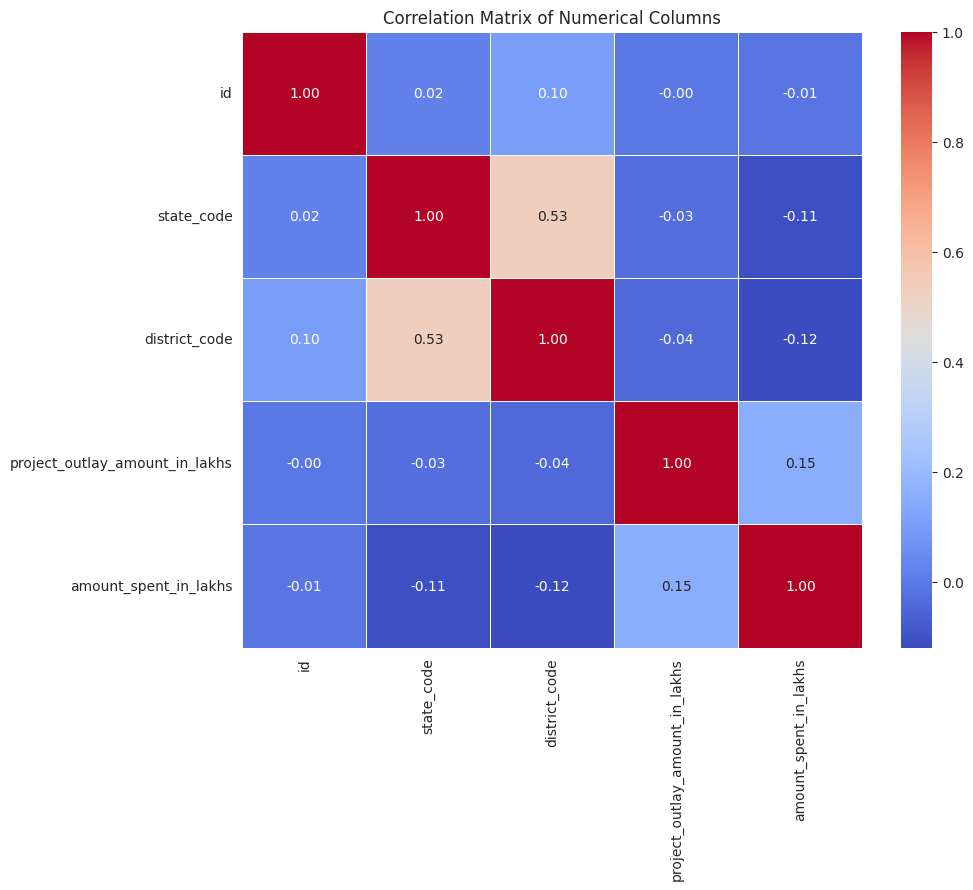

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Selects only the number columns from your data.

Calculates how strongly each pair of these columns is related (their correlation).

Creates a colored grid (heatmap) to show these relationships, with numbers on it. Blue means a negative relationship, red means a positive relationship.
Displays the grid.

Task 3: Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Task 3: Regression Analysis

# Check if df is defined
if 'df' not in locals() and 'df' not in globals():
    print("Error: The dataframe 'df' is not defined.")
    print("Please run the cells above that load the data into the 'df' variable (usually the first few code cells).")
else:
    # 1. Define the Problem:
    # Let's try to predict 'amount_spent_in_lakhs' based on other relevant features.

    # 2. Prepare the Data:
    # Select features (X) and target (y)
    # Exclude 'id', 'state_code', and 'district_code' as they are likely identifiers or codes
    # Include 'year', 'state_name', 'district_name', 'development_sector', and 'project_outlay_amount_in_lakhs'
    features = ['year', 'state_name', 'district_name', 'development_sector', 'project_outlay_amount_in_lakhs']
    target = 'amount_spent_in_lakhs'

    X = df[features]
    y = df[target]

    # Handle categorical variables using One-Hot Encoding
    # Identify categorical columns
    categorical_features = ['state_name', 'district_name', 'development_sector']

    # Create a column transformer to apply OneHotEncoder to categorical features
    # and leave other columns (like 'year' and 'project_outlay_amount_in_lakhs') as is.
    # We will drop the original categorical columns after encoding.
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
        remainder='passthrough' # Keep other columns
    )

    # The 'year' column is currently datetime. For a simple linear regression,
    # we might just extract the year as a numerical feature.
    # A more sophisticated approach might involve time-based features or a different model.
    X['year'] = X['year'].dt.year

    # Let's apply the preprocessor to the features
    X_processed = preprocessor.fit_transform(X)

    print("Shape of processed features:", X_processed.shape)
    print("\nFirst 5 rows of processed features (sparse matrix representation):")
    # Displaying a sparse matrix directly is not very informative,
    # but we can show the type and shape.
    print(type(X_processed))

Shape of processed features: (8489, 555)

First 5 rows of processed features (sparse matrix representation):
<class 'scipy.sparse._csr.csr_matrix'>


/tmp/ipython-input-3795934365.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = X['year'].dt.year



Training data shape (X_train): (6791, 555)
Testing data shape (X_test): (1698, 555)
Training target shape (y_train): (6791,)
Testing target shape (y_test): (1698,)

Linear Regression Model Trained.

Predictions made on the test set.

Model Evaluation:
Mean Squared Error (MSE): 46498179.01
R-squared (R2): -0.00


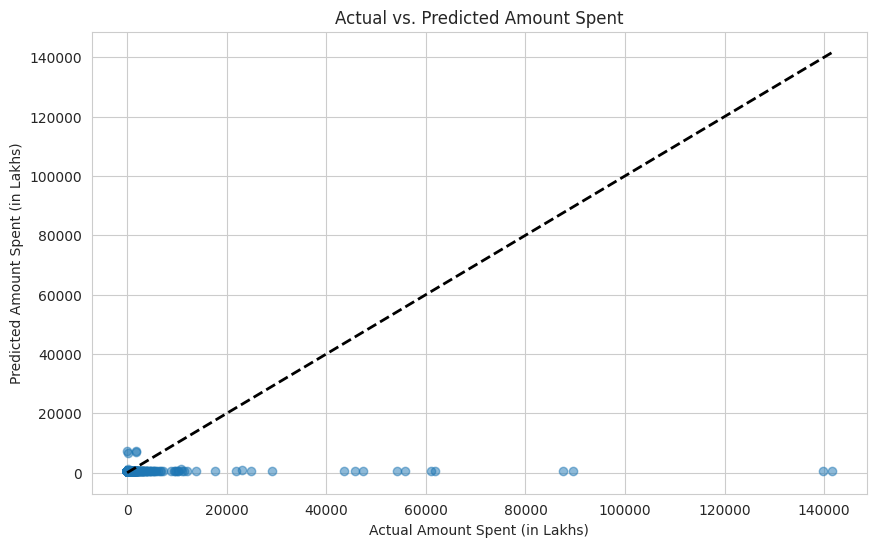

In [ ]:
# Continuing with Regression Analysis

# 3. Split Data:
# Split the data into training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

# 4. Train the Model:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression Model Trained.")

# 5. Make Predictions:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("\nPredictions made on the test set.")

# 6. Evaluate the Model:
# Evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optionally, visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Amount Spent (in Lakhs)")
plt.ylabel("Predicted Amount Spent (in Lakhs)")
plt.title("Actual vs. Predicted Amount Spent")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Plotting the identity line
plt.show()

In [ ]:
# Analyze Model Coefficients

# Get the feature names after one-hot encoding
# The get_feature_names_out() method is available in newer versions of scikit-learn (>= 1.0)
# If you are using an older version, you might need to manually construct feature names.
try:
    feature_names = preprocessor.get_feature_names_out(features)
except AttributeError:
    # Fallback for older scikit-learn versions (might require adjustments based on your version)
    # This is a simplified approach and might not be accurate for complex transformations
    categorical_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
    remaining_features = [f for f in features if f not in categorical_features]
    feature_names = list(categorical_feature_names) + remaining_features

# Create a DataFrame to store coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_})

# Sort coefficients by their absolute value to see the most influential features
coefficients_df['abs_coefficient'] = abs(coefficients_df['coefficient'])
coefficients_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False)

print("\nTop 10 Most Influential Features (by absolute coefficient value):")
display(coefficients_df.head(10))

print("\nInterpretation of Coefficients:")
print("- A positive coefficient for a feature means that as the value of that feature increases, the predicted amount spent tends to increase (holding other features constant).")
print("- A negative coefficient means that as the value of that feature increases, the predicted amount spent tends to decrease (holding other features constant).")
print("- The magnitude of the coefficient indicates the strength of the relationship.")


Top 10 Most Influential Features (by absolute coefficient value):


,feature,coefficient,abs_coefficient
554,remainder__project_outlay_amount_in_lakhs,6.334966e-06,6.334966e-06
359,onehot__district_name_Not Mentioned,1.868026e-14,1.868026e-14
0,onehot__state_name_All India,1.595763e-14,1.595763e-14
530,onehot__development_sector_Education,3.358152e-15,3.358152e-15
539,onehot__development_sector_Rural Development P...,2.362771e-15,2.362771e-15
31,onehot__state_name_Tamil Nadu,-1.793787e-15,1.793787e-15
533,onehot__development_sector_Health Care,1.692765e-15,1.692765e-15
29,onehot__state_name_Rajasthan,-1.688374e-15,1.688374e-15
19,onehot__state_name_Madhya Pradesh,-1.643537e-15,1.643537e-15
11,onehot__state_name_Gujarat,-1.510740e-15,1.510740e-15



Interpretation of Coefficients:
- A positive coefficient for a feature means that as the value of that feature increases, the predicted amount spent tends to increase (holding other features constant).
- A negative coefficient means that as the value of that feature increases, the predicted amount spent tends to decrease (holding other features constant).
- The magnitude of the coefficient indicates the strength of the relationship.


Model Performance: The R-squared value is around -0.00, indicating the model does not explain the variance in the amount spent.

Prediction Error: The Mean Squared Error (MSE) is approximately 46.5 million, showing large errors in predictions.

Feature Influence: Based on coefficients, 'project_outlay_amount_in_lakhs' is the most influential feature in this linear model, but its overall impact is very small. Other features like state, district, and sector have minimal linear impact.

Conclusion: The simple linear regression model is not a good fit for predicting amount_spent_in_lakhs with the current features and approach.

Task 4 K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define features for clustering
clustering_features = ['project_outlay_amount_in_lakhs', 'amount_spent_in_lakhs', 'development_sector']
X_clustering = df[clustering_features]

# Identify categorical and numerical features
categorical_features_clustering = ['development_sector']
numerical_features_clustering = ['project_outlay_amount_in_lakhs', 'amount_spent_in_lakhs']

# Create a column transformer for preprocessing
# Apply one-hot encoding to the categorical feature and scaling to numerical features
preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_clustering),
        ('scaler', StandardScaler(), numerical_features_clustering)
    ],
    remainder='passthrough' # Keep other columns (though none are remaining in this case)
)

# Create a pipeline with the preprocessor and KMeans
# We'll start with a placeholder for n_clusters; we might explore the optimal number later
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor_clustering),
                                  ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10)) # Starting with 4 clusters as an example
                                 ])

# Fit the pipeline to the data
kmeans_pipeline.fit(X_clustering)

# Get the cluster labels
df['cluster_label'] = kmeans_pipeline.named_steps['kmeans'].labels_

print("K-Means clustering performed.")
print("\nFirst 5 rows with cluster labels:")
display(df.head())

K-Means clustering performed.

First 5 rows with cluster labels:


,id,year,state_name,state_code,district_name,district_code,development_sector,project_outlay_amount_in_lakhs,amount_spent_in_lakhs,cluster_label
0,0,2014-01-01,All India,0,Not Mentioned,0,Agro Forestry,100.0,66.0,0
1,1,2014-01-01,All India,0,Not Mentioned,0,Animal Welfare,284.0,300.0,0
2,2,2014-01-01,All India,0,Not Mentioned,0,"Armed Forces, Veterans, War Widows/ Dependants",397.0,115.0,0
3,3,2014-01-01,All India,0,Not Mentioned,0,Art And Culture,3577.0,3586.0,0
4,4,2014-01-01,All India,0,Not Mentioned,0,Clean Ganga Fund,56.0,56.0,0


In [ ]:
# Analyze Cluster Characteristics

# Group the data by cluster label and calculate the mean of numerical features
cluster_analysis = df.groupby('cluster_label')[numerical_features_clustering].mean()

print("Mean values of numerical features for each cluster:")
display(cluster_analysis)

# You can also look at the distribution of categorical features within each cluster
# For example, the distribution of 'development_sector' in each cluster:
print("\nDistribution of 'development_sector' within each cluster:")
for cluster in sorted(df['cluster_label'].unique()):
    print(f"\nCluster {cluster}:")
    sector_distribution = df[df['cluster_label'] == cluster]['development_sector'].value_counts(normalize=True)
    display(sector_distribution.head()) # Display top sectors for brevity

Mean values of numerical features for each cluster:


,project_outlay_amount_in_lakhs,amount_spent_in_lakhs
cluster_label,,
0,1.818647e+06,335.743407
1,4.022555e+09,20276.258333
2,3.442526e+08,106386.125000
3,6.759408e+07,40246.282083



Distribution of 'development_sector' within each cluster:

Cluster 0:


,proportion
development_sector,
Education,0.150943
Health Care,0.121633
Rural Development Projects,0.071437
Environmental Sustainability,0.071318
"Poverty, Eradicating Hunger, Malnutrition",0.053400



Cluster 1:


,proportion
development_sector,
Education,0.666667
Health Care,0.166667
Rural Development Projects,0.166667



Cluster 2:


,proportion
development_sector,
Education,0.375
Rural Development Projects,0.250
Health Care,0.250
Other Central Government Funds,0.125



Cluster 3:


,proportion
development_sector,
Education,0.208333
Health Care,0.166667
Environmental Sustainability,0.125000
Rural Development Projects,0.104167
"Poverty, Eradicating Hunger, Malnutrition",0.104167


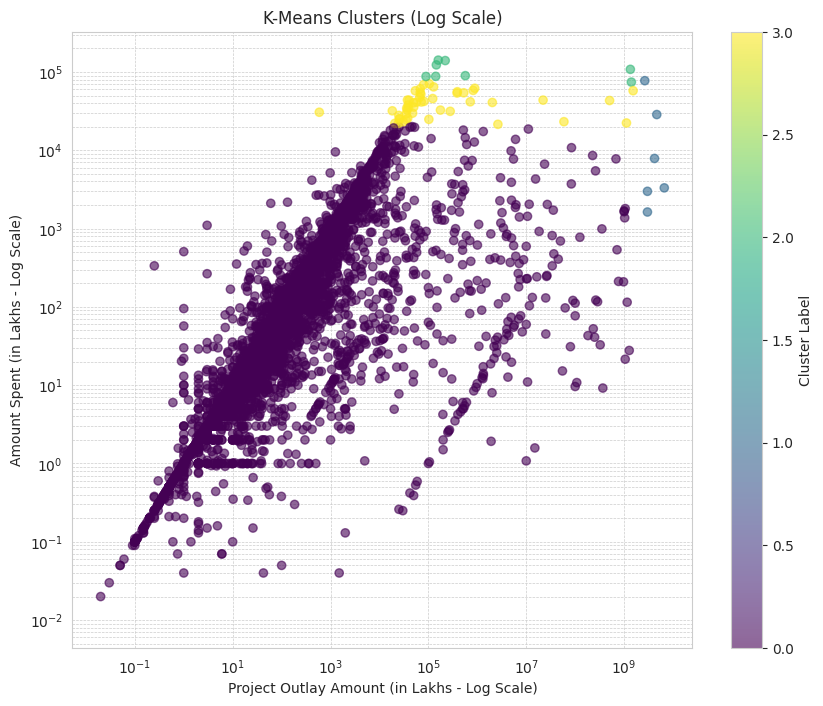

In [ ]:
# Visualize the clusters based on the two numerical features

plt.figure(figsize=(10, 8))

# Use log scale for both axes due to the wide range of values
plt.scatter(df['project_outlay_amount_in_lakhs'], df['amount_spent_in_lakhs'], c=df['cluster_label'], cmap='viridis', alpha=0.6)
plt.xscale('log')
plt.yscale('log')

plt.title('K-Means Clusters (Log Scale)')
plt.xlabel('Project Outlay Amount (in Lakhs - Log Scale)')
plt.ylabel('Amount Spent (in Lakhs - Log Scale)')
plt.colorbar(label='Cluster Label')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Axis: Both the X-axis (Project Outlay Amount) and Y-axis (Amount Spent) are on a log scale to handle the wide range of values.

Points: Each point represents a CSR project from the dataset.

Colors: The color of each point indicates the cluster it was assigned to by the K-Means algorithm.

Clusters:
The large cluster in the lower left (purple) represents the majority of projects with relatively low outlay and spending.
The smaller clusters in the upper right (yellow, green, cyan) represent projects with significantly higher outlay and spending.

Task 5 Applying k mediods

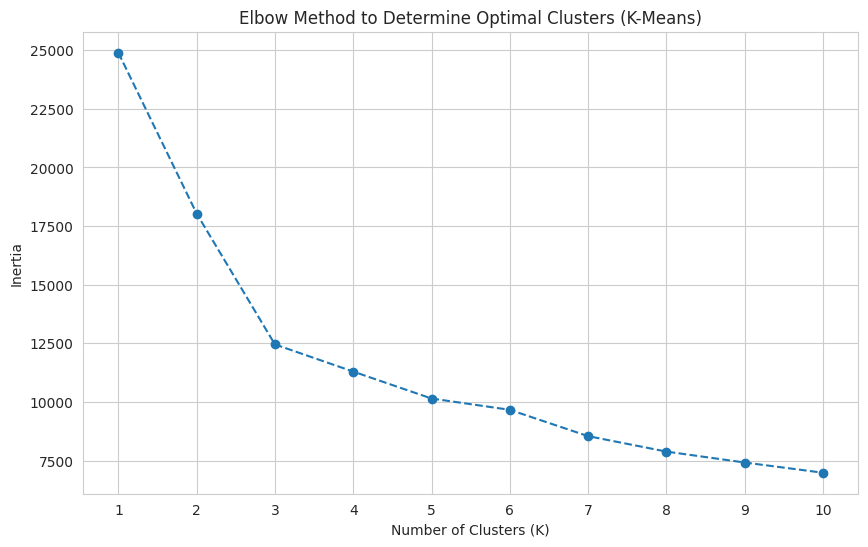

In [ ]:
# Determine the optimal number of clusters using the Elbow Method

# We will use the preprocessed data from the clustering pipeline
X_preprocessed_clustering = kmeans_pipeline.named_steps['preprocessor'].transform(X_clustering)

# Calculate inertia for a range of cluster numbers
inertia = []
# Let's test from 1 to 10 clusters
k_range = range(1, 11)

for k in k_range:
    # Initialize and fit KMeans for each k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed_clustering)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range) # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

In [ ]:
# Downgrade NumPy to a version compatible with scikit-learn-extra
!pip install "numpy<2.0"

# Re-install scikit-learn-extra to ensure it's built against the compatible NumPy
!pip install --upgrade --no-deps scikit-learn-extra

# Now, try importing KMedoids again
from sklearn_extra.cluster import KMedoids

print("Successfully imported KMedoids.")

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=1950039 sha256=6245eb96ace404bc8e5365baeacfaab010557a9b70f846e63df620c711b4ffb3
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra
Successfully imported KMedoids.


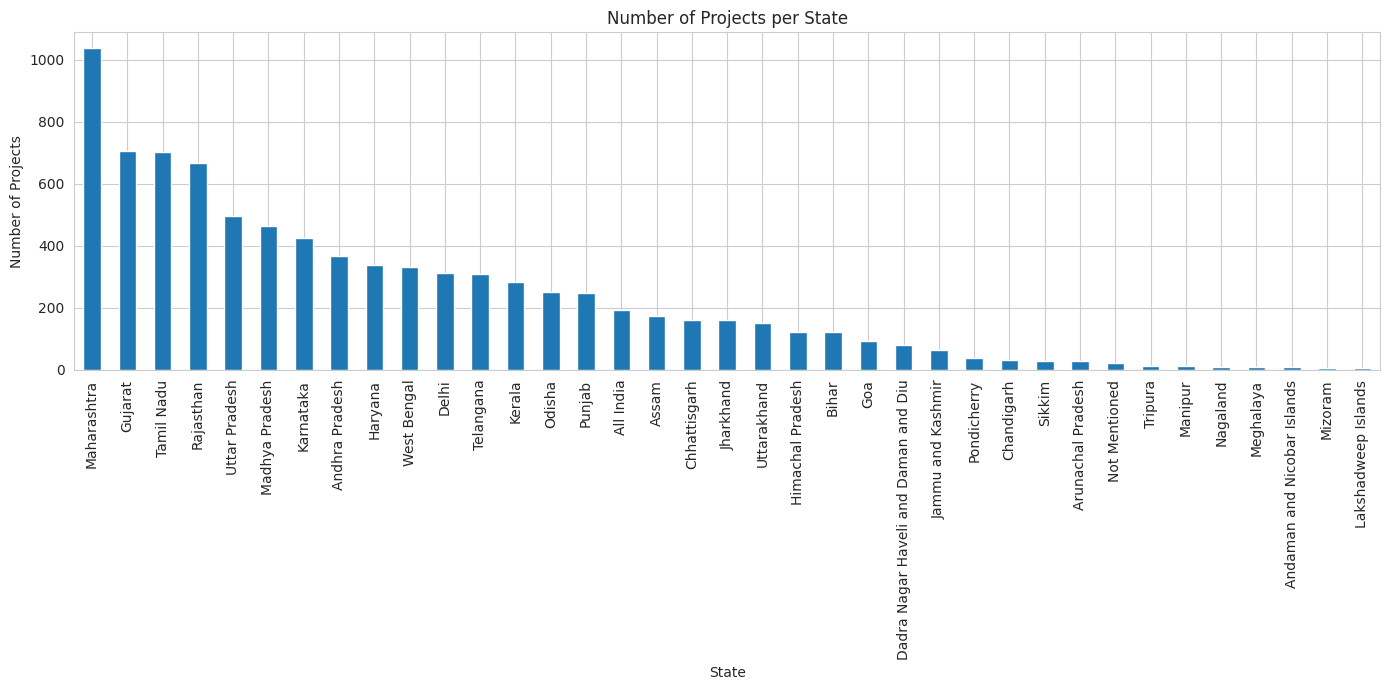

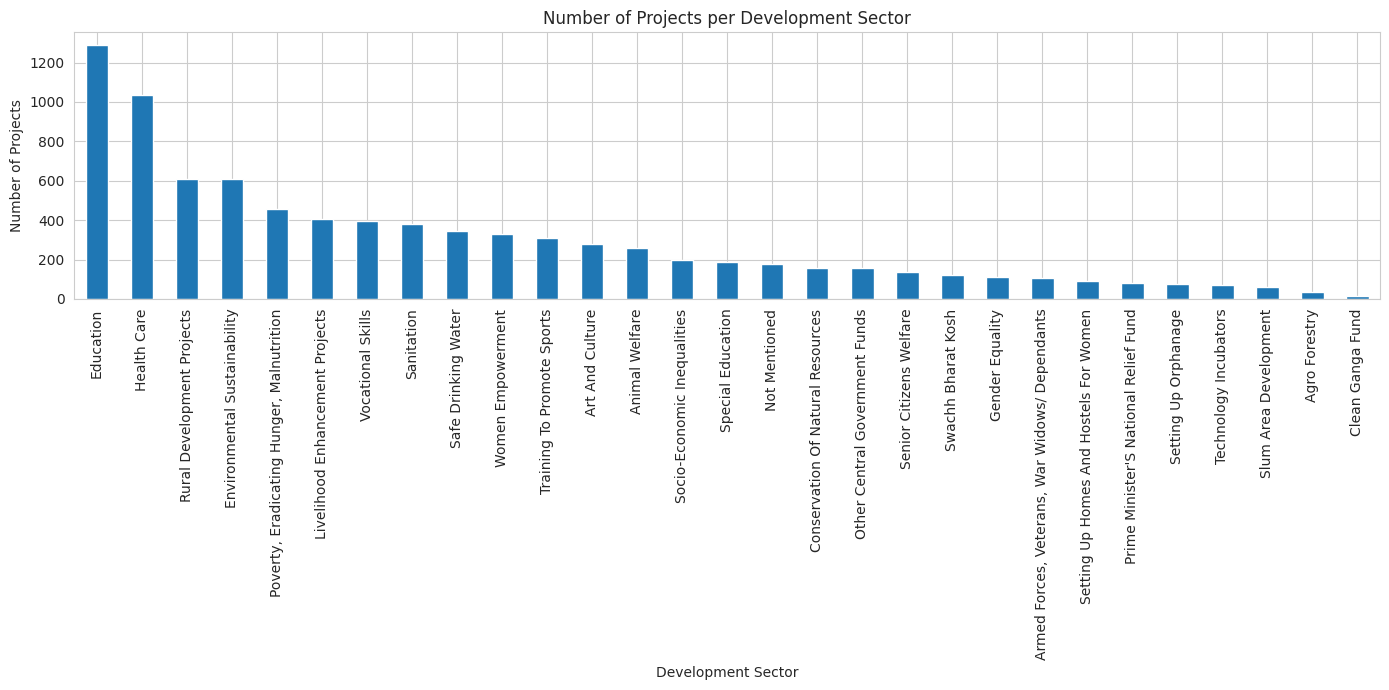

In [ ]:

# Visualize the number of projects per state
import matplotlib.pyplot as plt # Import matplotlib.pyplot

plt.figure(figsize=(14, 7))
state_counts = df['state_name'].value_counts()
state_counts.plot(kind='bar')
plt.title('Number of Projects per State')
plt.xlabel('State')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize the number of projects per development sector

plt.figure(figsize=(14, 7))
sector_counts = df['development_sector'].value_counts()
sector_counts.plot(kind='bar')
plt.title('Number of Projects per Development Sector')
plt.xlabel('Development Sector')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Install required library for K-Medoids (if not already installed)
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids

# We'll use the same preprocessor as before
# preprocessor_clustering was defined in the K-Means section

# Create a pipeline with the preprocessor and KMedoids
# We will use the same number of clusters (4) as in the initial K-Means for direct comparison
kmedoids_pipeline = Pipeline(steps=[('preprocessor', preprocessor_clustering),
                                   ('kmedoids', KMedoids(n_clusters=4, random_state=42))
                                  ])

# Fit the pipeline to the data
kmedoids_pipeline.fit(X_clustering)

# Get the cluster labels
df['kmedoids_cluster_label'] = kmedoids_pipeline.named_steps['kmedoids'].labels_

print("K-Medoids clustering performed.")
print("\nFirst 5 rows with K-Medoids cluster labels:")
display(df.head())

K-Medoids clustering performed.

First 5 rows with K-Medoids cluster labels:


,id,year,state_name,state_code,district_name,district_code,development_sector,project_outlay_amount_in_lakhs,amount_spent_in_lakhs,cluster_label,kmedoids_cluster_label
0,0,2014-01-01,All India,0,Not Mentioned,0,Agro Forestry,100.0,66.0,0,3
1,1,2014-01-01,All India,0,Not Mentioned,0,Animal Welfare,284.0,300.0,0,3
2,2,2014-01-01,All India,0,Not Mentioned,0,"Armed Forces, Veterans, War Widows/ Dependants",397.0,115.0,0,3
3,3,2014-01-01,All India,0,Not Mentioned,0,Art And Culture,3577.0,3586.0,0,2
4,4,2014-01-01,All India,0,Not Mentioned,0,Clean Ganga Fund,56.0,56.0,0,3


Task 14: Visualize Distribution of Amount Spent by Development Sector (Box Plot)

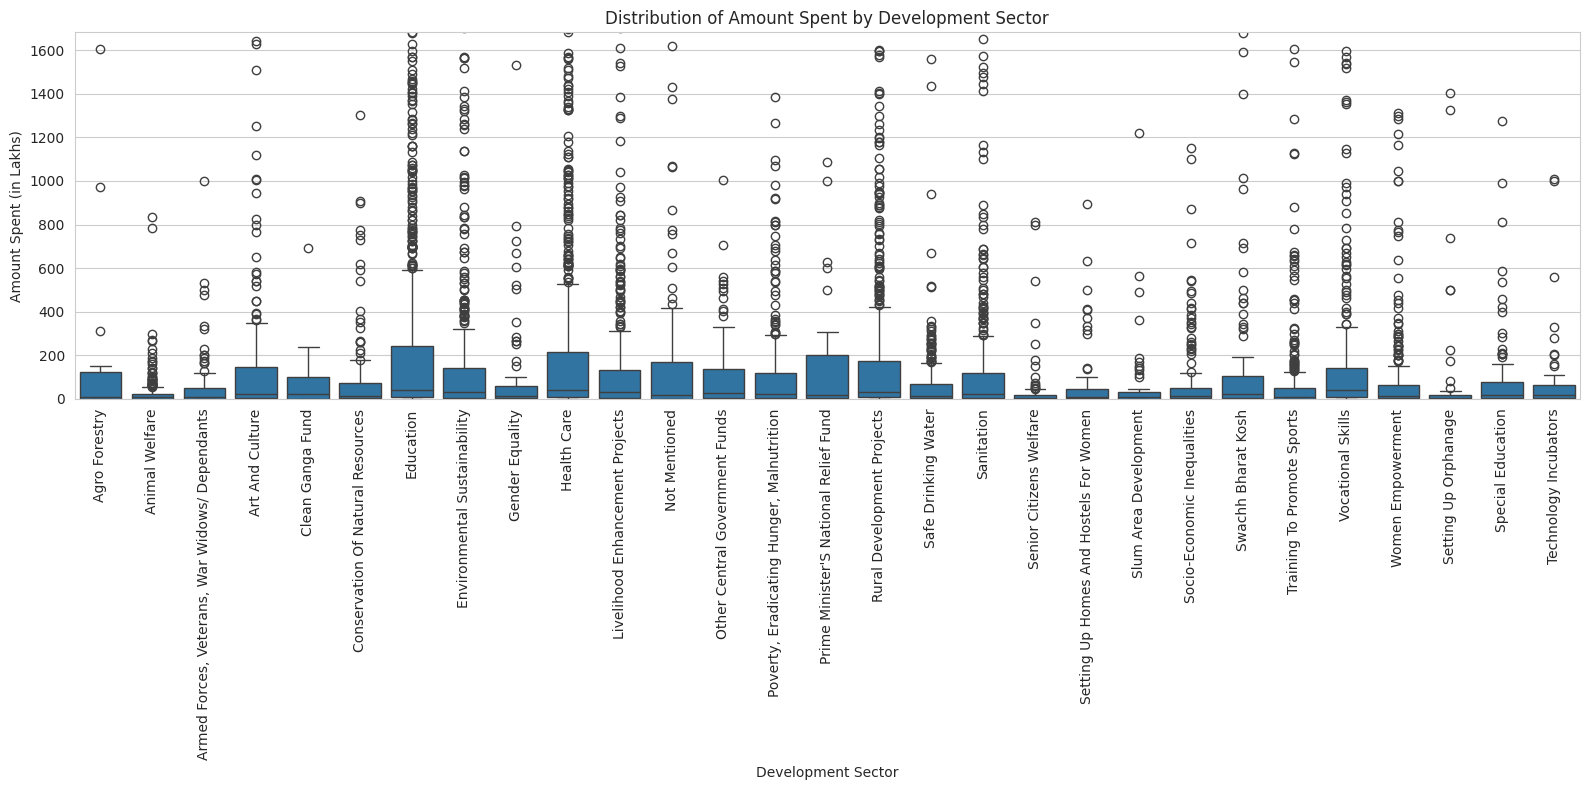

In [ ]:
# Visualize the distribution of 'amount_spent_in_lakhs' by 'development_sector' using box plots

plt.figure(figsize=(16, 8)) # Increase figure size for better readability
sns.boxplot(x='development_sector', y='amount_spent_in_lakhs', data=df)
plt.title('Distribution of Amount Spent by Development Sector')
plt.xlabel('Development Sector')
plt.ylabel('Amount Spent (in Lakhs)')
plt.xticks(rotation=90) # Rotate labels for better readability

# Due to the wide range of values and outliers, setting a y-limit can improve visibility of the main distributions
# Let's set the y-limit to a reasonable percentile, e.g., 95th percentile of amount_spent_in_lakhs
y_limit = df['amount_spent_in_lakhs'].quantile(0.95)
plt.ylim(0, y_limit)

plt.tight_layout() # Adjust layout
plt.show()

Based on the analysis performed:

1.  **Data Overview and Cleaning:** We loaded the dataset, inspected its structure and content (first few rows, data types, missing values, descriptive statistics, shape), and handled a negative value in the 'amount_spent_in_lakhs' column by setting it to zero. The dataset contains information on CSR project expenditure across different years, states, districts, and development sectors.

2.  **Data Visualization (Distributions):** Visualizations showed that both 'amount_spent_in_lakhs' and 'project_outlay_amount_in_lakhs' have highly right-skewed distributions, indicating that most projects have relatively low spending and outlay amounts, with a few projects having significantly higher values. We also visualized the distribution of projects by state and development sector, showing concentration in certain areas and sectors.

3.  **Regression Analysis:** We attempted to predict 'amount_spent_in_lakhs' using a simple linear regression model with features including year, state, district, sector, and project outlay. The model performed very poorly, with an R-squared value close to zero, indicating it did not effectively explain the variance in the amount spent. The analysis of coefficients suggested that 'project_outlay_amount_in_lakhs' was the most influential linear feature, but its impact was minimal, and categorical features had very little linear effect. This suggests a non-linear relationship or missing variables.

4.  **K-Means Clustering:** We applied K-Means clustering to group projects based on 'project_outlay_amount_in_lakhs', 'amount_spent_in_lakhs', and 'development_sector'.
    *   Using the Elbow Method, we identified that 2 or 3 clusters seemed more appropriate than the initial choice of 4.
    *   We then re-ran K-Means with 3 clusters.
    *   The analysis of the 3 clusters revealed a clear separation based on the scale of investment and expenditure:
        *   **Cluster 0:** Represents the majority of smaller projects with low outlay and spending.
        *   **Cluster 1:** Contains medium-to-large scale projects with higher average outlay and spending.
        *   **Cluster 2:** Consists of the largest projects with the highest average outlay and spending.
    *   The visualization of the 3 clusters on a log-scaled scatter plot of outlay vs. spent visually confirmed this grouping by financial scale.

5.  **K-Medoids Attempt:** We attempted to apply K-Medoids as an alternative clustering method due to its robustness to outliers, but were unable to proceed due to a persistent library compatibility issue (`ImportError`) with the `sklearn-extra` library.

Overall, the analysis highlighted the skewed nature of CSR project expenditures and successfully used K-Means clustering to identify distinct groups of projects based on their financial scale and associated development sectors. The simple linear regression model was not effective for prediction with the current features.